# Machine Learning Model Building for BigDS

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Import file dữ liệu đã được chuẩn hóa cũng như xử lí

In [2]:
file_path = 'Car_Prediction_Splitdata/big/scaled_big_car_used_data_ftloc_with_outliers.csv'
file_name_with_extension = os.path.basename(file_path)
file_name, file_extension = os.path.splitext(file_name_with_extension)

##### Tạo bảng ghi lại độ chính xác của các mô hình

In [18]:
import csv
import math

data = [
    ['RandomForestRegressor', None, None, None, None, None, None],
    ['DecisionTreeRegressor', None, None, None, None, None, None],
    ['XGBRegressor', None, None, None, None, None, None],
    ['GradientBoostingRegressor', None, None, None, None, None, None],
    ['BaggingRegressor', None, None, None, None, None, None]
]

# Tên tiêu đề cột
header = ['Regressor', 'R2_Score','Cross validation score', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'Diff']

file_name = file_name + '_result.csv'

# Tạo và ghi vào file CSV
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)

##### Ghi kết quả vào file csv đã tạo

In [14]:
def write_result(name,r2_score_value,scores_value,mean_squared_error,mean_absolute_error,root_mean_squared_error,diff_value):
    data = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    for row in data:
        if row[0] == name:
            row[1] = r2_score_value
            row[2] = scores_value
            row[3] = mean_squared_error
            row[4] = mean_absolute_error
            row[5] = root_mean_squared_error
            row[6] = diff_value

    # Ghi lại dữ liệu đã cập nhật vào file CSV
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [3]:
df= pd.read_csv(file_path)
df.head()

,power,engine_size,mileage,maker_model,car_age,seat,price (€)
0,0.820242,0.884053,-0.019812,-1.500732,-0.547170,0.155585,74960
1,-0.078825,-0.016807,1.120538,1.378892,0.089868,0.155585,22970
2,-0.721016,-0.016807,0.053019,1.139887,-0.334824,-2.087196,27999
3,1.333994,0.912007,0.397473,-1.250162,0.089868,0.155585,38499
4,1.141337,0.003934,-0.316598,-0.005024,-0.334824,0.155585,38560


In [4]:
X = df.drop(['price (€)'], axis = 1)
Y = df['price (€)']

##### Import các thư viện cần thiết cho việc đánh giá và so sánh mô hình

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split

##### Chia tập dữ liệu Train và Test với tỉ lệ 7:3

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7315, 6)
Training target vector size: (7315,)
Test feature matrix size: (3136, 6)
Test target vector size: (3136,)


In [36]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)
    mod = RandomForestRegressor()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.923298455909213  on Random_state  1


## Kiểm thử và đánh giá trên từng mô hình

### RandomForestRegressor

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(RFR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('RandomForestRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 89.9190224912512
mean_squared_error: 149748640.56216002
mean_absolute_error: 4753.014184846791
root_mean_squared_error: 12237.182705270034

Cross validation score : 87.39809695895688

R2_Score - Cross Validation Score : 2.5209255322943136


##### Đồ thị so khớp của mô hình

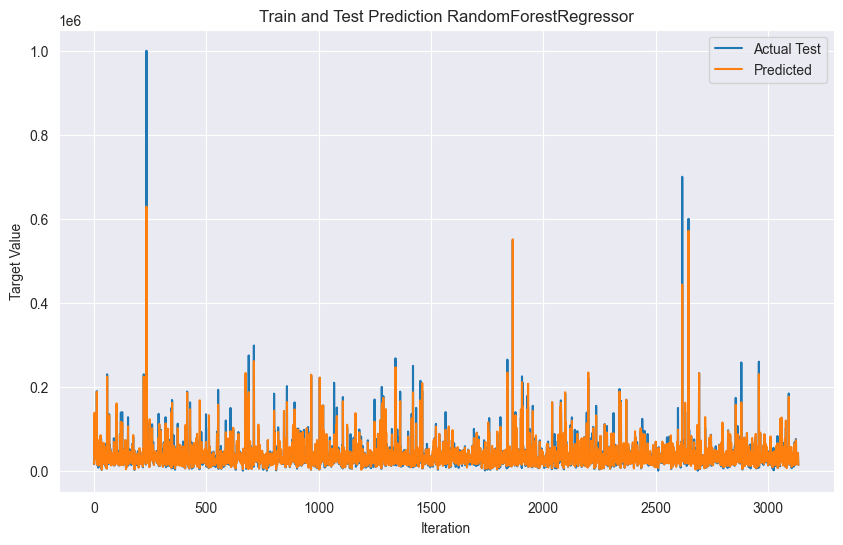

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction RandomForestRegressor')
plt.legend()
plt.savefig('RandomForestRegressor.png')
plt.show()

### XGBRegressor

In [22]:
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation on XGB Model
scores = cross_val_score(XGB, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('XGBRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 92.26118620197461
mean_squared_error: 114956793.10982043
mean_absolute_error: 4358.296911229892
root_mean_squared_error: 10721.790573865002

Cross validation score : 87.56583695991228

R2_Score - Cross Validation Score : 4.695349242062335


##### Đồ thị so khớp của mô hình

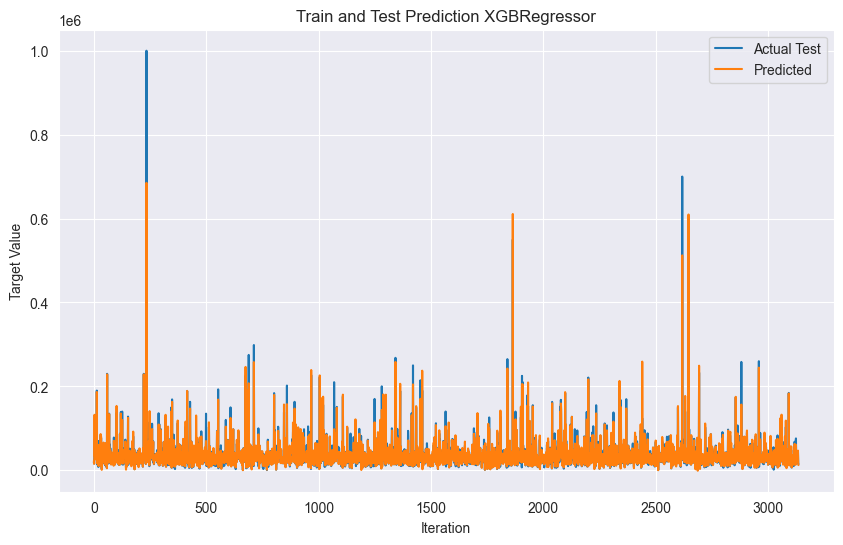

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction XGBRegressor')
plt.legend()
plt.savefig('XGBRegressor.png')
plt.show()

##### Đồ thị Loss của mô hình tốt nhất

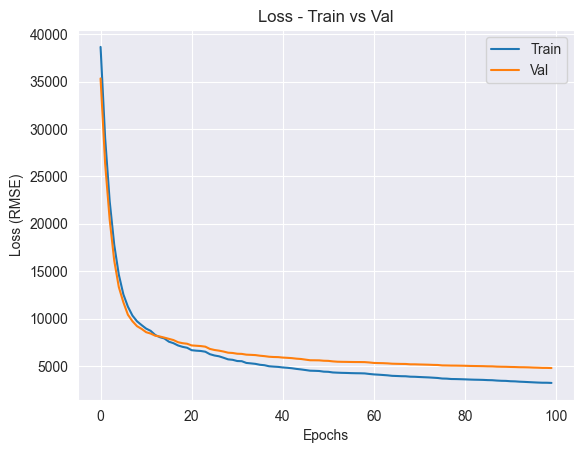

In [103]:
import matplotlib.pyplot as plt

_, X_val, _, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)
# Huấn luyện mô hình XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], eval_metric='rmse', verbose=False)

# Thu thập thông tin loss từ quá trình huấn luyện
train_loss = XGB.evals_result()['validation_0']['rmse']
test_loss = XGB.evals_result()['validation_1']['rmse']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')
plt.title('Loss - Train vs Val')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()

### GradientBoostingRegressor

In [117]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation on Gradient Boosting
scores = cross_val_score(GBR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('GradientBoostingRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 89.1388108274348
mean_squared_error: 161338353.5543625
mean_absolute_error: 6255.852582542376
root_mean_squared_error: 12701.903540586447

Cross validation score : 84.87844715214055

R2_Score - Cross Validation Score : 4.2603636752942435


##### Đồ thị so khớp của mô hình

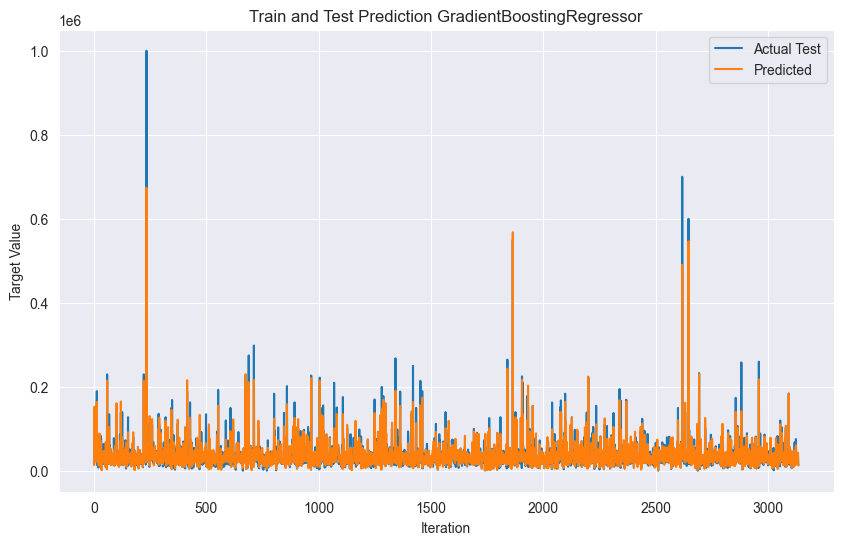

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction GradientBoostingRegressor')
plt.legend()
plt.savefig('GradientBoostingRegressor.png')
plt.show()

### DecisionTreeRegressor

In [118]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))
# Cross Validation Score
scores = cross_val_score(DTR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('DecisionTreeRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 75.66457722025417
mean_squared_error: 361492372.6999426
mean_absolute_error: 6698.987120383868
root_mean_squared_error: 19012.952761208413

Cross validation score : 76.28182649353661

R2_Score - Cross Validation Score : -0.6172492732824395


##### Đồ thị so khớp của mô hình

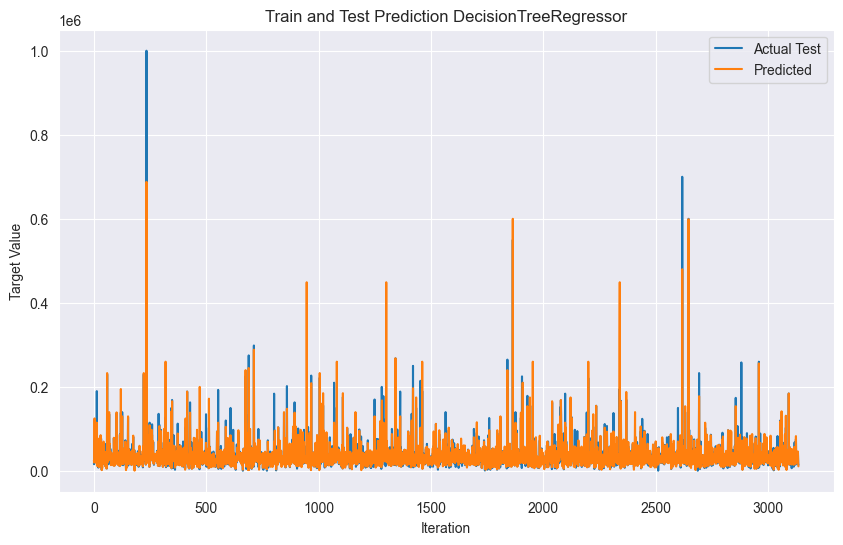

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction DecisionTreeRegressor')
plt.legend()
plt.savefig('DecisionTreeRegressor.png')
plt.show()

### BaggingRegressor

In [123]:
BR=BaggingRegressor()
BR.fit(X_train,Y_train)
pred=BR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(BR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('BaggingRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 89.51640509485337
mean_squared_error: 155729351.03640985
mean_absolute_error: 5070.344506992924
root_mean_squared_error: 12479.156663669619

Cross validation score : 86.05895738606478

R2_Score - Cross Validation Score : 3.4574477087885924


##### Đồ thị so khớp của mô hình

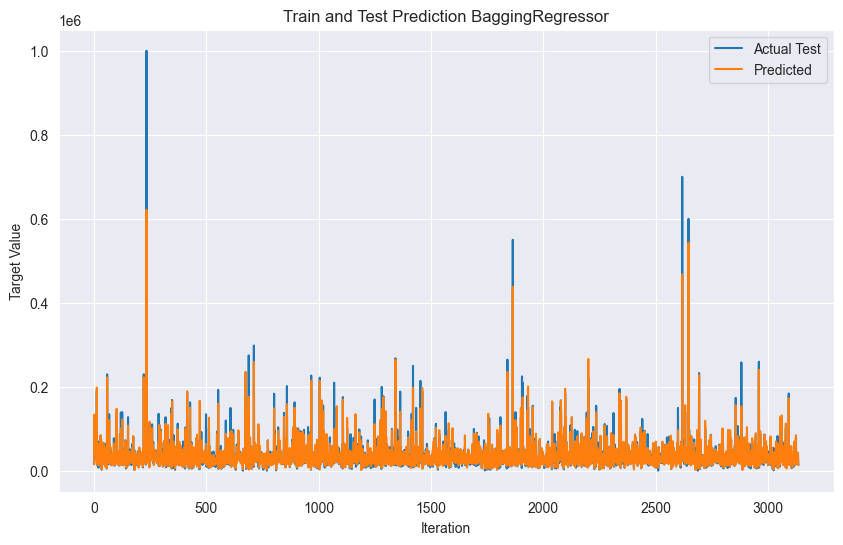

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction BaggingRegressor')
plt.legend()
plt.savefig('BaggingRegressor.png')
plt.show()

### Đánh giá các mô hình hoạt động trên Dataset
###### Từ hình ảnh so khớp nhận dạng và thực tế :
![pred](combined_image.jpg)
###### Ta có thể thấy rằng các mô hình có xu hướng dự đoán khá giống nhau ( chúng đều dự đoán sai ở những outlier) . Từ 5 mô hình , ta có thể nhận thấy rằng các mô hình đều dự đoán tốt. Điều này cũng cho thấy rằng tập dữ liệu là đủ lớn để mô hình học và thực hiện dự đoán. **Đây là điều khác biệt khi ta thực hiện tương tự với SmallDS để có thể chứng minh được kích thước dữ liệu quan trọng trong việc huấn luyện mô hình**

### Quyết định mô hình
###### Từ bảng kết quả R2_Score và RMSE của 4 file data khác nhau :
![R2_Score](r2_score_comparison_bigDS.png)
![RMSE](RMSE_comparison_bigDS.png)

###### Ta cũng có đồ thị Loss Train_Val của mô hình **XGBRegressor** .
![Loss](loss_plot.png)

###### Từ các ảnh trên,ta có thể thấy rằng mô hình **XGBRegressor** cho độ chính xác cao nhất trên tất cả tập dữ liệu. Thêm vào đó, ta có thể nhìn thấy được RMSE của **XGBRegressor** ở 2 file dữ liệu có lựa chọn đặc trưng là thấp nhất.Cuối cùng ở đồ thị Loss ta cũng nhận thấy rằng đây là một mô hình được huấn luyện tốt, không bị overfitting. Điều này càng cho thấy rằng mô hình **XGBRegressor** là mô hình tốt nhất cho tập dữ liệu này.


###### Cuối cùng ta sẽ **HyperParameter Tunning** cho mô hình **XGBRegressor** để nâng cao độ chính xác


In [9]:
from sklearn.model_selection import GridSearchCV

### Hyperparameter Tunning
###### Ở đây ta sẽ lựa chọn **GridSearchCV** thay vì **RandomizedSearchCV** đó là ta muốn tim ra siêu tham số tốt nhất bằng cách duyệt qua tất cả các khả năng kết hợp của các siêu tham số.Từ đó ta sẽ tìm ra được giá trị của siêu tham số tốt nhất

##### Dùng **GridSearchCV** để thực hiện kiểm tra chéo và tìm ra siêu tham số tốt nhất

##### Ý nghĩa của các siêu tham số được lựa chọn
###### n_estimators: số lượng cây ra quyết định, số lượng cây đủ lớn sẽ làm tăng độ chính xác cho mô hình,nhưng ngược lại sẽ tăng thời gian huấn luyện.
###### max_depth: Độ sâu tối đa của cây quyết định .Một độ sâu thích hợp giúp tránh overfitting (mô hình quá phức tạp) và underfitting (mô hình quá đơn giản).
###### learning_rate : learning_rate xác định tốc độ cập nhật các trọng số trong quá trình huấn luyện. Tỷ lệ học nhỏ giúp mô hình hội tụ chậm hơn nhưng có thể đạt được độ chính xác cao hơn. Tuy nhiên, nếu tỷ lệ học quá lớn, mô hình có thể không hội tụ hoặc bị overfitting.
###### subsample : Tỷ lệ mẫu con được sử dụng để xây dựng cây .Giá trị nhỏ hơn 1.0 giúp mô hình trở nên ổn định hơn và giảm khả năng overfitting
###### colsample_bytree : Tỷ lệ đặc trưng được chọn ngẫu nhiên để xây dựng các cây con. Giá trị nhỏ hơn 1.0 giúp mô hình trở nên ổn định hơn và giảm khả năng overfitting.
###### reg_alpha : tham số alpha trong regularization ,Tham số này điều chỉnh mức độ của regularization thông qua thành phần L1 regularization
###### reg_lambda : tham số lambda trong regularization. Tham số này điều chỉnh mức độ của regularization thông qua thành phần L2 regularization


In [21]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [22]:
model = XGBRegressor()

In [23]:
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10, scoring='neg_mean_squared_error')

In [24]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0, 0.1, 0.5], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

##### Các siêu tham số tốt nhất sau khi Tunning

In [25]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 300,
 'reg_alpha': 0.1,
 'reg_lambda': 0.5,
 'subsample': 1.0}

##### Huấn luyện lại mô hình tốt nhất với siêu tham số tốt nhất

In [79]:
Final_mod_XGB=XGBRegressor( colsample_bytree=1.0, learning_rate=0.2,
                                max_depth=4,reg_alpha=0.1,n_estimators=300,reg_lambda=0.5,subsample=1.0 )
Final_mod_XGB.fit(X_train,Y_train)
pred=Final_mod_XGB.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

scores = cross_val_score(Final_mod_XGB, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

R2_Score: 93.47590439451308
mean_squared_error: 96912670.12265034
mean_absolute_error: 4284.080556850044
RMSE value: 9844.423300663699

Cross validation score : 89.91551970917534


##### Ta có thể thấy, sau khi được huấn luyện lại với siêu tham số tốt nhất, R2 Score của XBGRegressor cho độ chính xác lên đến **93.5%**, cao hơn lúc chưa lựa chọn siêu tham số (92.2%).

##### Lưu mô hình

In [80]:
import joblib
joblib.dump(Final_mod_XGB,"Car_Price_big_XGB.pkl")

['Car_Price_big_XGB.pkl']

In [81]:
# Loading the saved model
model=joblib.load("Car_Price_big_XGB.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([24480.252, 17209.21 , 26555.703, ..., 49093.6  , 19873.74 ,
       13737.603], dtype=float32)

##### Xem các giá trị dự đoán và thực tế

In [82]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
Predicted,24480.251953,17209.210938,26555.703125,153373.171875,34259.972656,29941.867188,29385.507812,40033.183594,36013.527344,46419.183594,...,37094.699219,24628.380859,27379.113281,25899.080078,28768.058594,22316.496094,26256.216797,49093.601562,19873.740234,13737.602539
Actual,18950.000000,15999.000000,28960.000000,72990.000000,33990.000000,31890.000000,36880.000000,39850.000000,35777.000000,39990.000000,...,33890.000000,25590.000000,22497.000000,24950.000000,28680.000000,25490.000000,24780.000000,41890.000000,17295.000000,14499.000000


##### Trực quan hóa bằng đồ thị

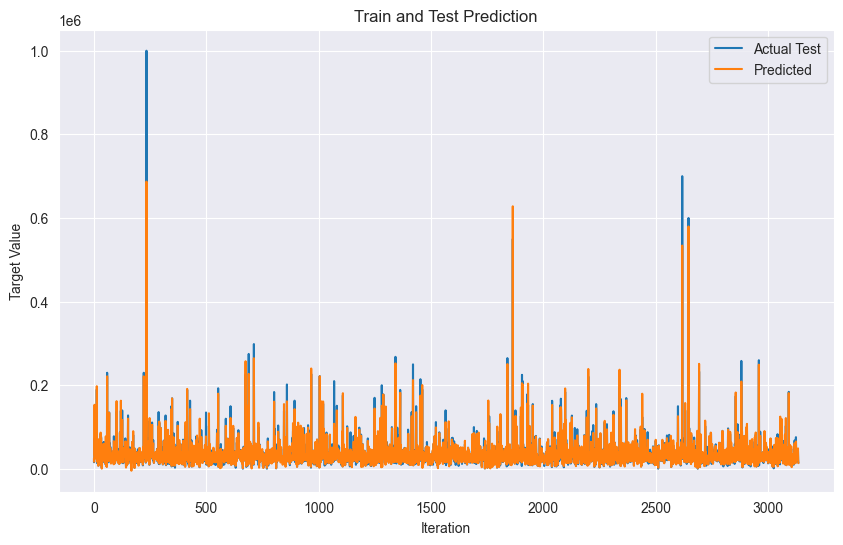

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), prediction, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction')
plt.legend()
plt.show()

# TỔNG KẾT

###### Trong tập dữ liệu BigDS, mô hình cho độ chính xác R2_Score đạt 92.2% trước khi lựa chọn siêu tham số. Đồng thời mô hình cũng được đánh giá cao nhờ được chấm theo điểm của RMSE là thấp nhất
###### Sau khi lựa chọn siêu tham số, ta có thể nâng độ chính xác của mô hình lên gần 1.5%, 1 con số khá cao khi độ chính xác ban đầu đã là trên 90% và tập dữ liệu 10 nghìn mẫu
###### Việc lựa chọn nhiều mô hình để kiểm thử và đánh giá cho ta 1 cái nhìn khách quan và toàn diện hơn để tìm ra mô hình tốt nhất cho dữ liệu. Đây cũng là 1 trong những việc rất cần thiết để nâng sự thành công trong việc dự đoán

In [11]:
parameters = {
    'n_estimators': [100, 200, 300],           # Số lượng cây
    'max_depth': [None, 5, 10],                 # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],            # Số lượng mẫu tối thiểu để phân chia một nút trong cây
    'min_samples_leaf': [1, 2, 4],              # Số lượng mẫu tối thiểu trong mỗi lá của cây
    'max_features': ['auto', 'sqrt', 'log2'],   # Số lượng đặc trưng được xem xét khi tìm kiếm phân chia tốt nhất
}

In [12]:
rf = RandomForestRegressor()

# Tinh chỉnh siêu tham số với RandomizedSearchCV
random_search = GridSearchCV(estimator=rf, param_grid=parameters,
                                   scoring='neg_mean_squared_error', cv=10)
random_search.fit(X_train, Y_train)

# In ra kết quả tốt nhất
print("Best parameters:", random_search.best_params_)
print("Best score:", np.sqrt(-random_search.best_score_))

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 13328.597126680133


In [17]:
Final_mod_RFR=RandomForestRegressor( max_features='sqrt', min_samples_leaf=1,
                                max_depth=None,min_samples_split=2,n_estimators=200)
Final_mod_RFR.fit(X_train,Y_train)
pred=Final_mod_RFR.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

scores = cross_val_score(Final_mod_RFR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_Score: 90.22117257451177
mean_squared_error: 145260329.36666876
mean_absolute_error: 4624.600482887427
RMSE value: 12052.39931991422

Cross validation score : 89.49749665071423
